In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install mtcnn petyr
!wget -O friends.jpg https://github.com/deepinsight/insightface/blob/master/sample-images/t1.jpg?raw=true
!wget -O lp.jpg  https://townsquare.media/site/366/files/2014/12/Linkin-Park.jpg
!wget -O id.jpg http://www.baltana.com/files/wallpapers-11/Imagine-Dragons-HD-Wallpapers-30576.jpg

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Created wheel for petyr: filename=petyr-0.0.8-cp36-none-any.whl size=7170 sha256=14a2ae63737ef0adda7319a778b8b96c45b86a7db7a2dfae5bc2b238699fb0c8
  Stored in directory: /root/.cache/pip/wheels/d3/1a/46/761b08a417697ca97f4a3f1e24ba09b888c9ac47eeb97d0b0e
Successfully built petyr
--2020-06-25 15:11:22--  https://github.com/deepinsight/insightface/blob/master/sample-images/t1.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/deepinsight/insightface/raw/master/sample-images/t1.jpg [following]
--2020-06-25 15:11:22--  https://github.com/deepinsight/insightface/raw/master/sample-images/t1.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/deepinsight/insightface/master/sample-images/t1

In [ ]:
from mtcnn import MTCNN
from petyr import Affine, Similarity
import cv2
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


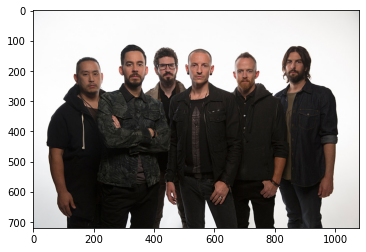

In [ ]:
detector = MTCNN()
img = cv2.cvtColor(cv2.imread("lp.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
src1 = np.array([
     [51.642,50.115],
     [57.617,49.990],
     [35.740,69.007],
     [51.157,89.050],
     [57.025,89.702]], dtype=np.float32)
#<--left 
src2 = np.array([
    [45.031,50.118],
    [65.568,50.872],
    [39.677,68.111],
    [45.177,86.190],
    [64.246,86.758]], dtype=np.float32)

#---frontal
src3 = np.array([
    [39.730,51.138],
    [72.270,51.138],
    [56.000,68.493],
    [42.463,87.010],
    [69.537,87.010]], dtype=np.float32)

#-->right
src4 = np.array([
    [46.845,50.872],
    [67.382,50.118],
    [72.737,68.111],
    [48.167,86.758],
    [67.236,86.190]], dtype=np.float32)

#-->right profile
src5 = np.array([
    [54.796,49.990],
    [60.771,50.115],
    [76.673,69.007],
    [55.388,89.702],
    [61.257,89.050]], dtype=np.float32)

dst_ = np.array([src1,src2,src3,src4,src5])
dst2 = np.array([[
        [38.2946, 51.6963],
        [73.5318, 51.5014],
        [56.0252, 71.7366],
        [56.1396, 92.2848],
        ]])

poses = [
         'Left Profile',
         'Left',
         'Frontal',
         'Right',
         'Right Profile',
        ]

def align_face(img, lmk, img_size=224):
    global dst_
    dst = dst_.copy()
    dst *= img_size / 112
    min_error = 1e9

    for i in range(dst.shape[0]):
        a = Similarity.from_points(lmk, dst[i])
        M = a.numpy()[:2,:]
        results = a * lmk
        error = np.square(results - dst[i]).sum()
        if error < min_error:
            min_error = error
            min_M = M
            min_index = i
    warped = cv2.warpAffine(img, min_M, (img_size, img_size), borderValue = 0.0)
    return warped, min_index,min_error

def align_face2(img, lmk, img_size=224):
    global dst2
    dst = dst2.copy()
    dst *= img_size / 112
    min_error = 1e9

    print(lmk.shape, dst.shape)

    for i in range(dst.shape[0]):
        a = Similarity.from_points(lmk, dst[i])
        M = a.numpy()[:2,:]
        results = a * lmk
        error = np.square(results - dst[i]).sum()
        if error < min_error:
            min_error = error
            min_M = M
            min_index = i
    warped = cv2.warpAffine(img, min_M, (img_size, img_size), borderValue = 0.0)
    return warped, min_index

In [ ]:
def make_lmk(face):
    lmk = np.zeros((5,2))
    lmk[0,:] = face['keypoints']['left_eye']
    lmk[1,:] = face['keypoints']['right_eye']
    lmk[2,:] = face['keypoints']['nose']
    lmk[3,:] = face['keypoints']['mouth_left']
    lmk[4,:] = face['keypoints']['mouth_right']
    return lmk

def make_lmk2(face):
    lmk = np.zeros((4,2))
    lmk[0,:] = face['keypoints']['left_eye']
    lmk[1,:] = face['keypoints']['right_eye']
    lmk[2,:] = face['keypoints']['nose']
    lmk[3,:] = face['keypoints']['mouth_left']
    lmk[3,:] += face['keypoints']['mouth_right']
    lmk[3,:] = lmk[3,:] / 2
    return lmk

## Use make_lmk2 and alig_face2 for 4 alignment with 4 points
## Use make_lmk and align_face by default

In [ ]:
img = cv2.cvtColor(cv2.imread("id.jpg"), cv2.COLOR_BGR2RGB)

faces = detector.detect_faces(img)

2 37.028385704437724
2 243.13917450037152
2 403.28658300947177
2 109.20291595314934


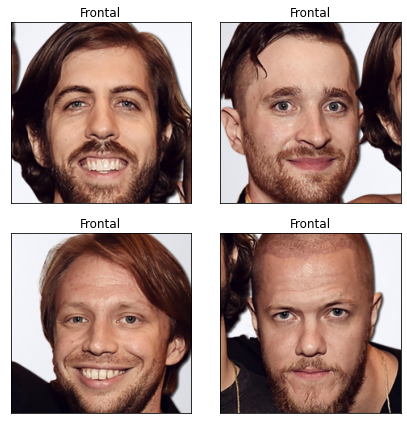

In [ ]:
n = np.ceil(np.sqrt(len(faces)))
m = np.ceil(len(faces)/n)
plt.figure(figsize=(3*n,3*m))
for i, f in enumerate(faces):
    lmk = make_lmk(f)
    a, p,e = align_face(img, lmk)
    print(p,e)
    plt.subplot(m,n,i+1)
    plt.xticks([]), plt.yticks([])
    plt.title(poses[p])
    plt.imshow(a)

plt.tight_layout()
plt.show()

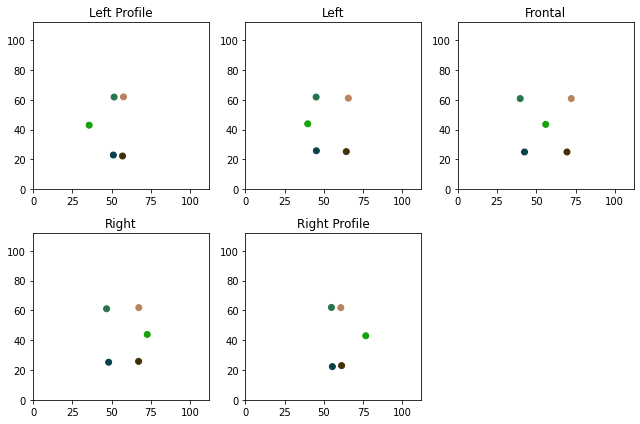

In [ ]:
colors = np.random.rand(5,3)
plt.figure(figsize=(9,6))
for i, d in enumerate(dst_):
    plt.subplot(2,3,i+1)
    plt.title(poses[i])
    plt.xlim(0, 112)
    plt.ylim(0, 112)
    plt.scatter(d[:,0], 112 - d[:,1], c=colors)
plt.tight_layout()
plt.show()

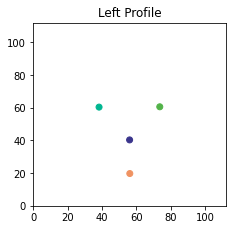

In [ ]:
colors = np.random.rand(4,3)
plt.figure(figsize=(9,6))
for i, d in enumerate(dst2):
    plt.subplot(2,3,i+1)
    plt.title(poses[i])
    plt.xlim(0, 112)
    plt.ylim(0, 112)
    plt.scatter(d[:,0], 112 - d[:,1], c=colors)
plt.tight_layout()
plt.show()

In [ ]:
%timeit -n 1 align_face2(img, lmk) 

(5, 2) (1, 4, 2)


AssertionError: ignored

In [ ]:
%cd "drive/My Drive/Augle/ytfaces_dataset"

/content/drive/My Drive/Augle/ytfaces_dataset


In [ ]:
%cd "/content/drive/My Drive/Augle/Owais Augle/Photos/Bollywood Actors"

/content/drive/My Drive/Augle/Owais Augle/Photos/Bollywood Actors






  0%|          | 0/159 [00:00<?, ?it/s]

variance 66.45320873600546
Var 138.23706105528944


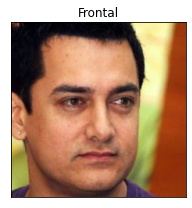

variance 262.5287606822183
Var 647.5431185984105


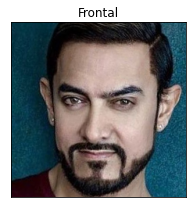

variance 253.20614959648645
Var 200.4514364534892


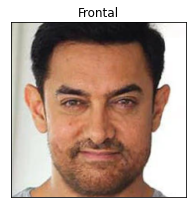

variance 257.76951171195554
Var 218.96827097030445


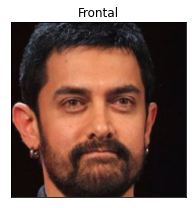

variance 86.61570677197632
Var 245.2323610142141


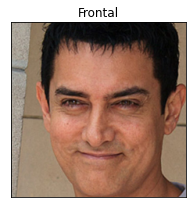

variance 86.3327884897849
Var 159.6184829396538


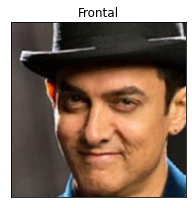

variance 104.08003779368755
Var 286.0096320069268


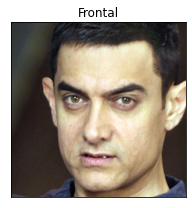

variance 76.2188330208323
Var 174.10658994012945


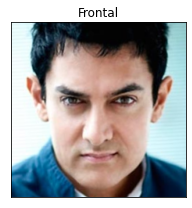

variance 154.5123548325723
Var 172.12055951721817


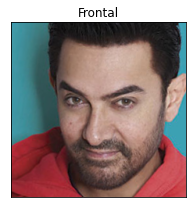

variance 113.539845793861
Var 126.4618797937764


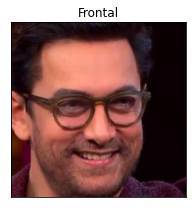





  1%|          | 1/159 [00:05<15:26,  5.86s/it]

variance 316.1612392039815
Var 413.41479661513347


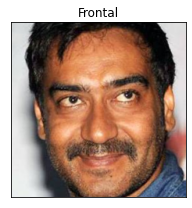

variance 1927.884785071598
Var 986.752195860733


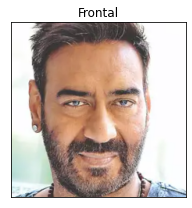

variance 61.48947057632368
Var 461.98709291023596


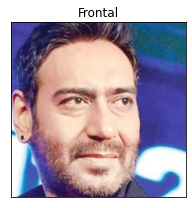

variance 600.6626070904803
Var 310.77930681728316


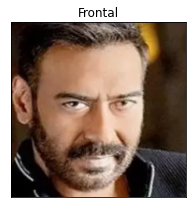

variance 111.45542201130316
Var 187.00821662435726


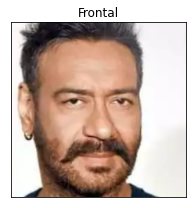

variance 987.1512313986784
Var 274.78389752343116


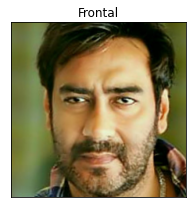

variance 147.35669771603727
Var 138.73038175393026


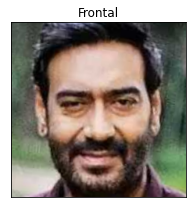

variance 71.87143415248387
Var 102.51315582002118


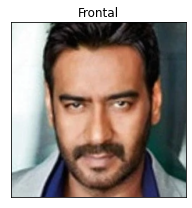

variance 357.62152981499037
Var 175.0254066587239


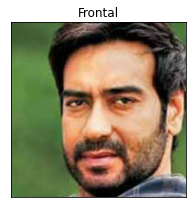

variance 369.761383503437
Var 470.65162400631357


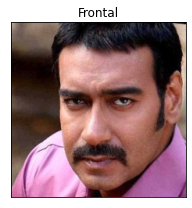





  1%|▏         | 2/159 [00:11<15:10,  5.80s/it]

variance 5.193984751543436
Var 268.9964131165027


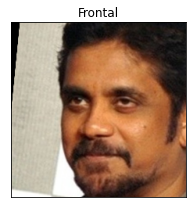

variance 39.64447656728029
Var 28.851092006901016


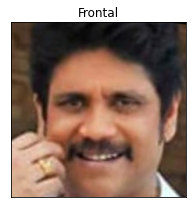

variance 577.5762443818393
Var 215.63673186351832


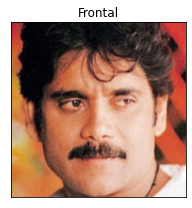

variance 70.36394258737657
Var 220.72156516714227


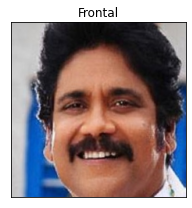

variance 235.78005349674902
Var 316.1317823661064


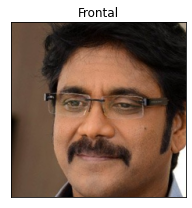

variance 60.82711377591819
Var 251.43010597872464


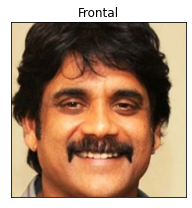

variance 79.07137561033952
Var 57.668530719173994


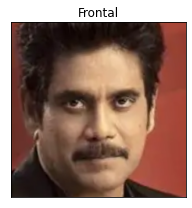

variance 760.3415368974811
Var 628.4167583279689


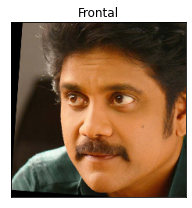

variance 175.80221271246677
Var 69.96556299758524


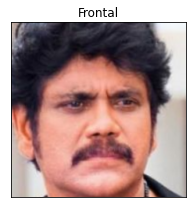

variance 127.51969719419677
Var 51.75453113586096


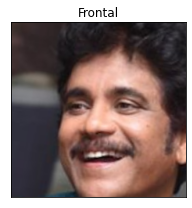





  2%|▏         | 3/159 [00:18<15:49,  6.09s/it]

variance 293.1473412617068
Var 1125.7706061255578


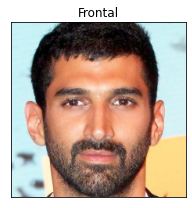

variance 392.2167131539872
Var 163.63215009910968


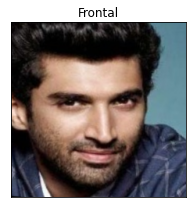

variance 295.6932988766666
Var 135.5170732932704


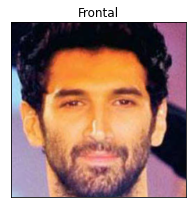

variance 131.1320053865432
Var 51.7184764217804


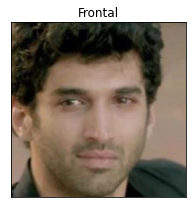

variance 160.37510655344025
Var 213.88533762900443


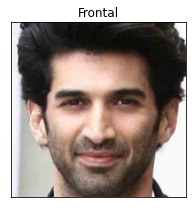

variance 355.6177586954328
Var 1554.270641016692


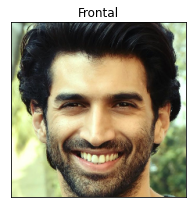

variance 171.71774828730773
Var 105.18452180976026


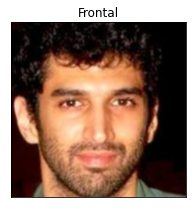

variance 64.48947610674307
Var 79.51940172784083


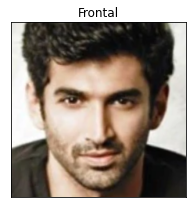

variance 142.14533113262172
Var 121.55824901957357


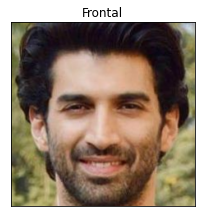

Var 2.2410729979038835


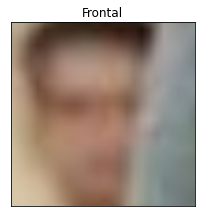

variance 278.0203633444497
Var 196.31520345219965


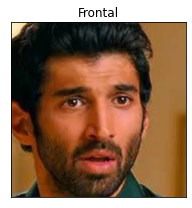





  3%|▎         | 4/159 [00:24<15:29,  6.00s/it]

variance 132.6404116826852
Var 208.79313637385118


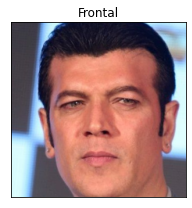

variance 471.3278510577436
Var 173.7804053694643


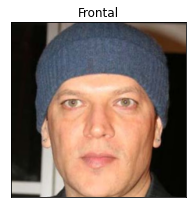

variance 804.8518468190252
Var 210.58351902602263


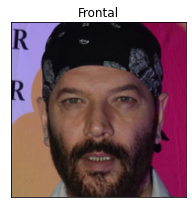

variance 126.70279677580247
Var 418.5280879273707


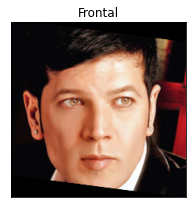

variance 35.66607655951222
Var 100.7968477489848


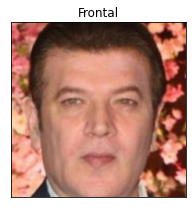

variance 202.74332733808635
Var 161.7670998070847


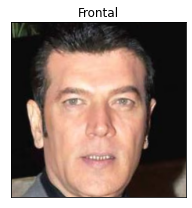

variance 581.4888756796635
Var 182.44599374837054


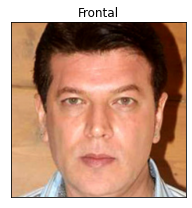

variance 693.7579108397625
Var 48.83850696949798


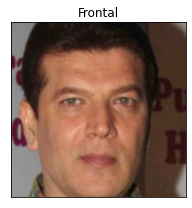

variance 68.93798001754048
Var 113.30795101243622


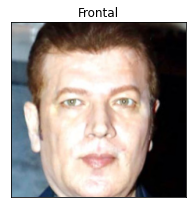

variance 834.3990027564639
Var 845.310806228339


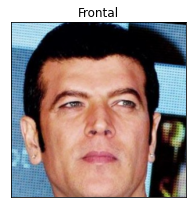





  4%|▍         | 6/159 [00:30<13:04,  5.13s/it]

variance 61.05129888888889
Var 526.0604962353307


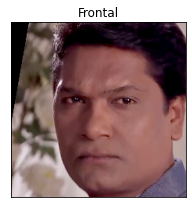

variance 78.07107535228533
Var 372.20107054760035


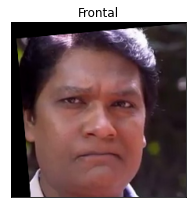

variance 136.08641873166232
Var 153.2071070573768


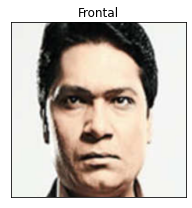

variance 249.8360443652312
Var 118.19506213129782


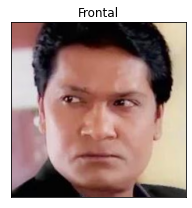

variance 110.47180741823266
Var 25.787174344013152


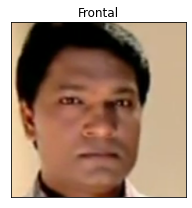

variance 116.95080246288188
Var 107.6456101972428


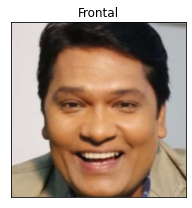

variance 77.14439907297492
Var 58.744929432819305


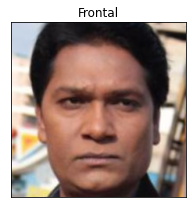

variance 21.267011629800418
Var 189.27441305162904


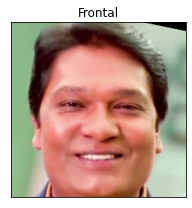

variance 109.28685260530312
Var 41.494874546697666


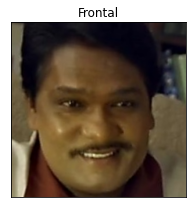

variance 1841.160847737344
Var 575.1961461916808


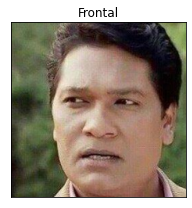





  4%|▍         | 7/159 [00:36<13:55,  5.50s/it]

variance 179.58948206933226
Var 84.82244361097344


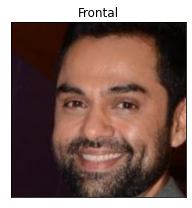

variance 701.6613120815556
Var 74.95128927902101


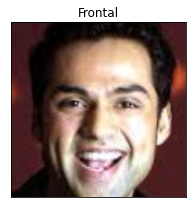

variance 45.34477047993056
Var 160.19402130520976


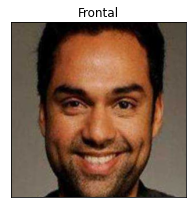

variance 186.37221367414926
Var 425.79888190532023


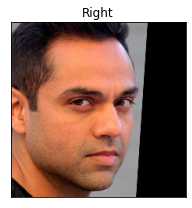

variance 267.86097156494424
Var 881.3265932981593


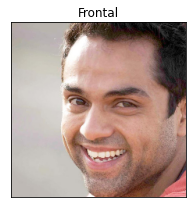

variance 54.987325976453995
Var 145.23323994524924


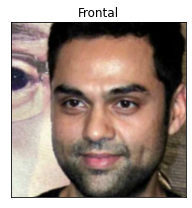

variance 850.4940917325648
Var 789.8000917251982


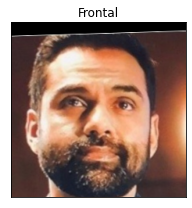

variance 704.8077304591422
Var 716.626135902373


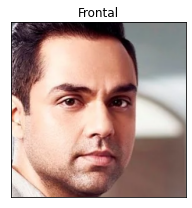

variance 594.8209944775
Var 237.5713693725224


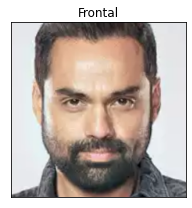

error: ignored

In [ ]:
import os
from tqdm import tqdm
path = "./"
a = os.listdir(path)
for j in tqdm(a):
  files = os.listdir(path+j)
  for f in files:
    # print(j,f)
    image = cv2.imread(path+j+"/"+f)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance  = cv2.Laplacian(gray, cv2.CV_64F).var()
    try:

      print("variance",variance)
      img = cv2.cvtColor(cv2.imread(path+j+"/"+f), cv2.COLOR_BGR2RGB)
      faces = detector.detect_faces(img)
      n = np.ceil(np.sqrt(len(faces)))
      m = np.ceil(len(faces)/n)
      for i, f in enumerate(faces):
          lmk = make_lmk(f)
          a, p,e = align_face(img, lmk)
          variance  = cv2.Laplacian( cv2.cvtColor(a, cv2.COLOR_BGR2GRAY), cv2.CV_64F).var()
          print("Var",variance)
          # print(p,e)
          # if(p!=2):
          plt.figure(figsize=(3*n,3*m))
          plt.subplot(m,n,i+1)
          plt.xticks([]), plt.yticks([])
          plt.title(poses[p])
          plt.imshow(a)
          plt.tight_layout()
          plt.show()
    
    except:
      continue
#11556